# EXPLORE Data Science Academy Classification Hackathon

© Explore Data Science Academy

---
### Problem Statement

South Africa is a society that is a very diverse and multicultural country. This is also characterised by it's linguistic diversity. There is plenty of space and freedom for every person to express themselves in any language and/or culture that they are comfortable with. Language is an important aspect of any society and it contributes greatly to the life of the South African society holistically, i.e cultural, econimic, political, social, etc.

As it currently stands, as of May 2023, South Africa has 12 official languages, each equal in legal state. With these number of official language it makes sense that most South African are able to speak at least two official languages. 

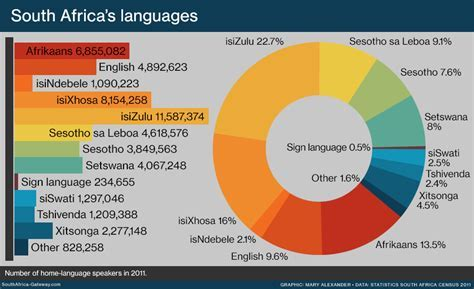

[Image credit](https://southafrica-info.com/arts-culture/11-languages-south-africa/)


With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

---

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Cleaning </a>

<a href=#three>4. Exploratory Data Analysis (EDA)</a>

<a href=#four>5. Pre-Processing</a>

<a href=#five>6. Modeling</a>

<a href=#six>7. Model Evaluation and Conclusions</a>


 <a id="one"></a>
## 1. Importing Packages


---


In this section we load all the packages that we will need for our subsequent sections. These include all the modules we will need for our data science and visualisation, Natural Language Processing (NLP) libraries and Machine Learning (ML) libraries.

In [1]:
# Importing modules for data science and visualisation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 180 # Quality of all figures in notebook

# NLP Libraries
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from os import path
from PIL import Image

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import pos_tag

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data


---
 

In this section we load our data from our local machine and do take a look at some basic things in our data, i.e the shape of our data and what our data looks like by looking at the first five rows of both our train and test datasets. We also create copies of out datasets to use later in our coding should we make any mistakes with the original data.

In [2]:
# Load train and test data
df_train = pd.read_csv('C://Users/44475/Documents/GitHub/Classification-Heckathon/Classification-Heckathon/train_set.csv')
df_test = pd.read_csv('C://Users/44475/Documents/GitHub/Classification-Heckathon/Classification-Heckathon/test_set.csv')

In [3]:
# create copies of our train and data set to use in case we make a mistake
dftrain = df_train.copy()
dftest = df_test.copy()

In [4]:
# take a look at the shape of the train data, how many rows and columns it has 
df_train.shape

(33000, 2)

Looking at our train data we have 33000 rows with two columns.

In [5]:
# Look at the first five rows of the train data
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [6]:
# take a look at the shape of the test data, how many rows and columns it has 
df_test.shape

(5682, 2)

Our test data has 5682 rows with two columns.

In [7]:
# Look at the first five rows of the test data
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


<a id="three"></a>
## 3. Data Cleaning
<a class="anchor" id="1.1"></a>

In this section of our notebook we take a look at the basic info of our train and test datasets. We also check if there are any any missing values that need to be remedied and if any, see how we can remedy them.

In [8]:
#basic info of the training dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [9]:
#basic info of the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [10]:
# check for any missing values in the training dataset
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [11]:
# check for any missing values in the testing dataset
df_test.isnull().sum()

index    0
text     0
dtype: int64

Fortunately, both our datasets do not contain any missing values. So move on to our EDA section.

<a id="three"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>

---



In the Exploratory Data Analysis(EDA) section we examine and visualize our data so we can better understand it and see what patterns we have. This section is important in informing the decisions in the subsequent sections.

In [12]:
# check our unique y variable
languages = list(np.unique(np.array(df_train.lang_id.to_list())))
languages

['afr', 'eng', 'nbl', 'nso', 'sot', 'ssw', 'tsn', 'tso', 'ven', 'xho', 'zul']

Based on the output, we have 11 unique languages in our dataset.

In [13]:
# we check the distribution of the 11 languages
total_dist = df_train.groupby(by = 'lang_id').count()
total_dist

,text
lang_id,
afr,3000
eng,3000
nbl,3000
nso,3000
sot,3000
ssw,3000
tsn,3000
tso,3000
ven,3000


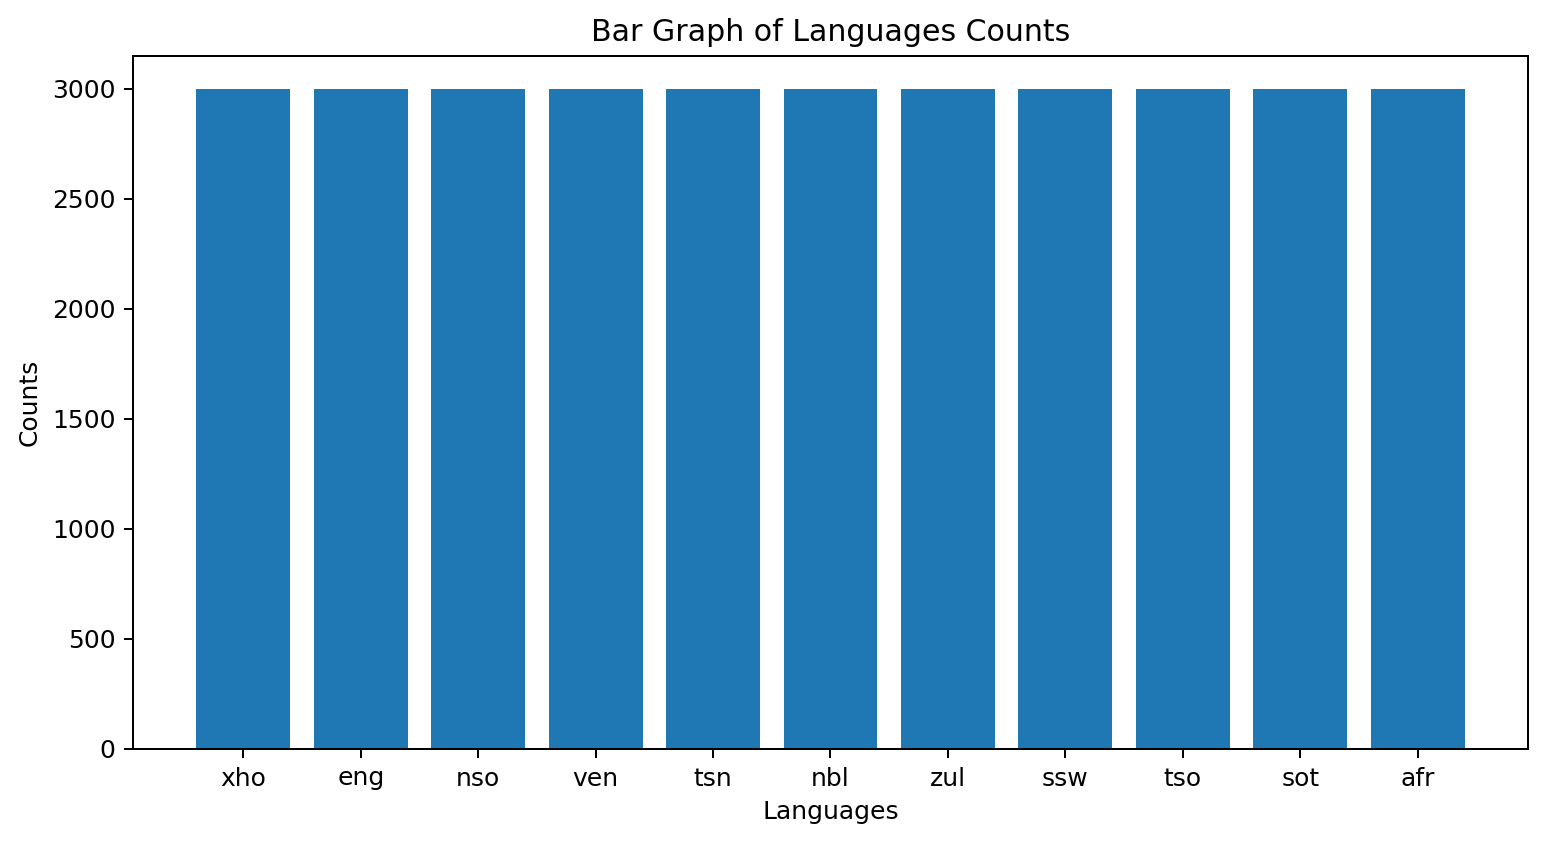

In [14]:
# Set the figure size
plt.figure(figsize=(10, 5)) 

# Calculate the frequency of each category
category_counts = df_train['lang_id'].value_counts()

# Extract the categories and their counts
categories = category_counts.index.tolist()
counts = category_counts.tolist()

# Create the bar plot
plt.bar(categories, counts)

# Add labels and title
plt.xlabel('Languages')
plt.ylabel('Counts')
plt.title('Bar Graph of Languages Counts')

# Display the plot
plt.show()


Based on the bar graph and the distribution list, the data is normally distributed so there won't be any need for any resampling. We also noticed that the test dataset has some some fn entries and we try and investigate these entries.



In [15]:
# We collect the entries having fn tags for analysis
have_fn = []
for i in df_test.index:
    txt = df_test.loc[i].text
    if '<fn>' in txt:
        have_fn.append(txt)

In [16]:
# lets print some of those special cases and see how they look like
have_fn[:4]

['<fn>(762010101403 AM) 1495 Final Gems Birthing Options_ZULU.txt</fn>',
 '<fn>GOV-ZA.107publicemercycommunicationtrestaffhelpoutatshelterformandeladayEn.2012-02-10.en.txt</fn>',
 '<fn>11311VQF2005.txt</fn>',
 '<fn>GOV-ZA.109cogtastakeholders2En.2012-02-10.en.txt</fn>']

In [17]:
# how many of those special cases are available
fn_total = len(have_fn)
fn_total

108

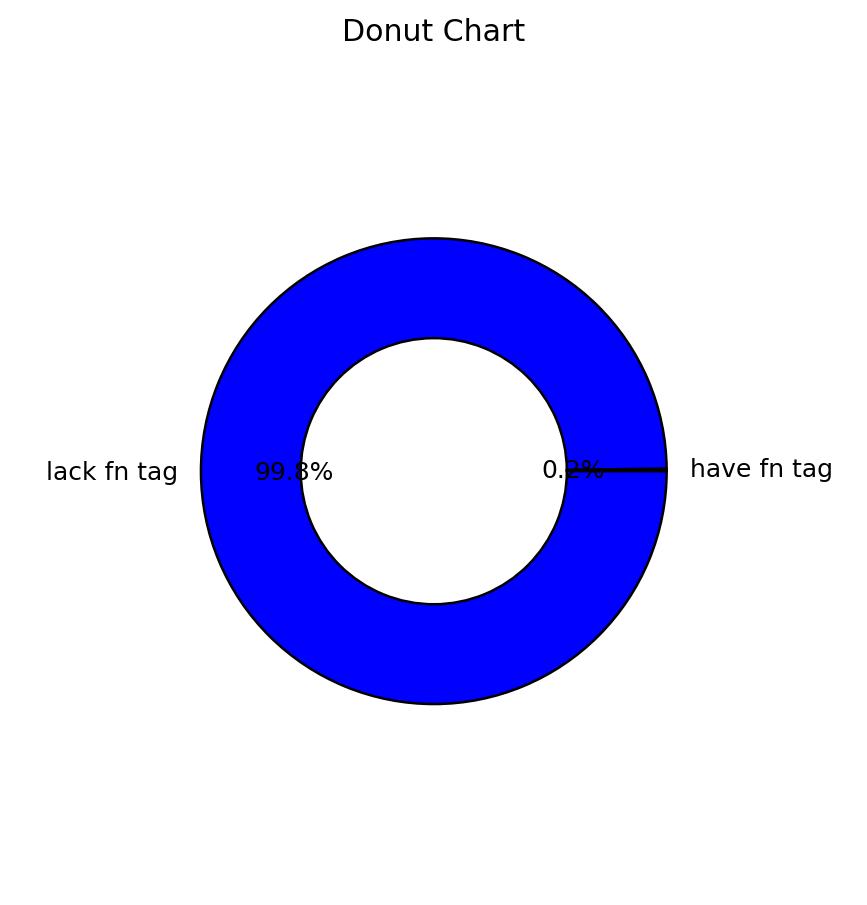

In [18]:
import matplotlib.pyplot as plt

df_test_total = df_test.shape[0]
fn_total = 10  # Assuming you have a variable called `fn_total` defined

labels = ['have fn tag', 'lack fn tag']
values = [fn_total, (df_test_total - fn_total)]

# Set the figure size
fig, ax = plt.subplots(figsize=(6, 6))

# Create the outer pie chart (donut hole)
ax.pie([100], colors=['white'], radius=1.0, wedgeprops=dict(width=0.3, edgecolor='white'))

# Create the inner pie chart (donut sections)
ax.pie(values, labels=labels, autopct='%1.1f%%', colors=['green', 'blue'], radius=0.7, wedgeprops=dict(width=0.3, edgecolor='black'))

# Set aspect ratio to be equal so that the chart is circular
ax.set(aspect="equal")

# Set the title
plt.title('Donut Chart')

# Display the chart
plt.show()



In [19]:
# lets get the fn total percentage
fail_percentage = np.round((fn_total/df_test_total)*100,2)
fail_percentage

0.18

<a id="three"></a>
## 5. Pre-Processing
---

In [20]:
def clean_text(text):
    # replace the html characters with " "
    text=re.sub('<.*?>', ' ', text)
    
    #Removal of numbers
    text = re.sub(r'\d+', ' ', text)
    
    # will replace newline with space
    text = re.sub("\n"," ",text)
    
    # will convert to lower case
    text = text.lower()
    
    # will split and join the words
    text=' '.join(text.split())
    
    return text

In [21]:
#we then apply the text processing to our data
df_train['text'] = df_train['text'].apply(clean_text)
df_test['text'] = df_test['text'].apply(clean_text)

In [22]:
# Replace '.txt' with 'text file'
df_train['text'] = df_train['text'].str.replace(".txt", " text file")
df_test['text'] = df_test['text'].str.replace(".txt", " text file")

<a id="three"></a>
## 6. Modelling
---

In [23]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Import vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Assign alias to vectorizer
vect = TfidfVectorizer()

In [24]:
#we devide our features into the x and y as follows
X = df_train['text']
y = df_train['lang_id']

In [25]:
vector = TfidfVectorizer(sublinear_tf=True)
vector = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X_vector = vector.fit_transform(X)

In [31]:
X_vector.shape

(33000, 207493)

In [32]:
# Splitting the previously defined features and label of your dataset
X_train, X_test, y_train, y_test = train_test_split(X_vector, y, test_size=0.2, random_state=42)

In [33]:
names = ['Logistic Regression', 'Nearest Neighbors', 
         'Naive Bayes']

In [34]:
classifiers = [
    LogisticRegression(), 
    KNeighborsClassifier(3),
    MultinomialNB(alpha=0.3)
]

In [35]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)
    
    print ('... predicting')
    y_pred = clf.predict(X_train)   
    y_pred_test = clf.predict(X_test)
    
    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average = 'weighted')
    recall    = metrics.recall_score(y_train, y_pred, average = 'weighted')
    
    f1        = metrics.f1_score(y_train, y_pred, average = 'weighted')    
    f1_test   = metrics.f1_score(y_test, y_pred_test, average = 'weighted')    
    
    # Save the results to dictionaries
    models[name] = clf    
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)
    
    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

    
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Naive Bayes model...
... predicting
... scoring
... All done!


In [36]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Naive Bayes,0.999886,0.999887,0.999886,0.999886,0.999091,0.188472
Logistic Regression,0.999508,0.999508,0.999508,0.999508,0.995757,27.839202
Nearest Neighbors,0.983826,0.983892,0.983826,0.983805,0.963087,0.034731


<Axes: xlabel='Classifier'>

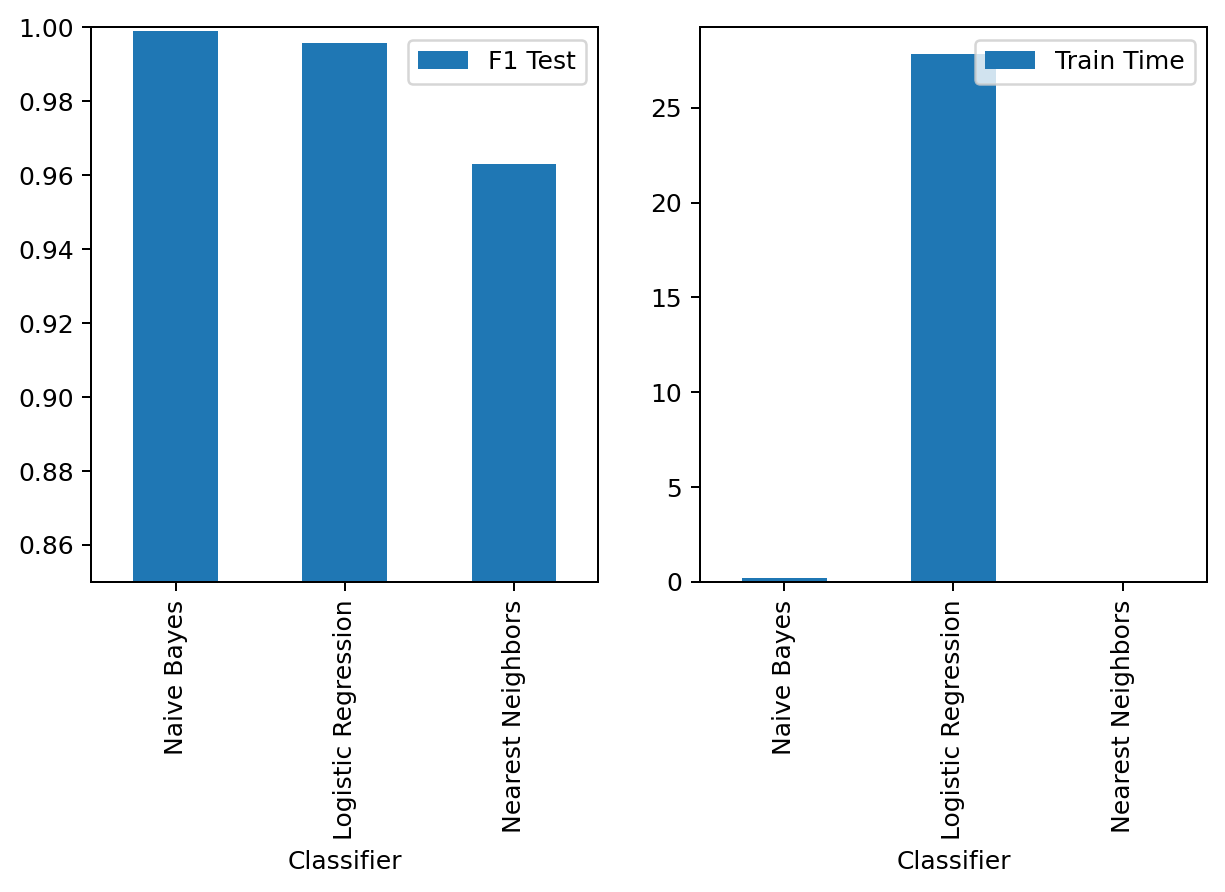

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.85,1.00])
results.plot(y='Train Time', kind='bar', ax=ax[1])

In [48]:
submission_df = pd.DataFrame(df_test['index'])
test1 = df_test['text'] #using cleaned test text data 
# vectorise test data
test_vec = vector.transform(test1) # replace cv with tfidt if used a different vectorizer
# Predict the sentiment using the test data
y_pred = clf.predict(test_vec) #replace clf with any model you wanna 
# Assign a new column of predictions
submission_df['lang_id'] = y_pred
# save the csv file and submit it. 
submission_df.to_csv('submission.csv', index=False)

In [51]:
submission_df = pd.DataFrame(df_test['index'])

submission_df['lang_id'] = y_pred # predictions generated by stacking 

submission_df.to_csv('submissionfinal.csv', index=False)


<a id="three"></a>
## 6. Model Evaluation and Conclusions
